# Imports and Data Preparation

In [1]:
%matplotlib inline

import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
#convert data to df

directory = os.path.join(os.getcwd(), 'data', 'cleaned_data')

# Dictionary to store DataFrames loaded from each pickle file, using filenames as keys
dfs = {}

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".pkl"):
        # Construct the full path to the pickle file
        filepath = os.path.join(directory, filename)
        
        # Load the DataFrame from the pickle file
        with open(filepath, 'rb') as f:
            df = pickle.load(f)
        
        # Use the filename (without extension) as the key for the DataFrame dictionary
        df_name = os.path.splitext(filename)[0]
        
        # Store the DataFrame in the dictionary
        dfs[df_name] = df


In [3]:
#define dfs to be used for eda

list_of_dfs = list(dfs.keys())
print(list_of_dfs)

df_i = dfs.get('cleaned_df_i')
df_c = dfs.get('df_c_train')
df_t = dfs.get('df_t_train')
# joined_df_i_t = dfs.get('joined_df_i_t')
joined_df_train = dfs.get('joined_df_t_c_i_train')

['df_c_train', 'joined_df_i_t_c', 'df_t_test', 'cleaned_df_i', 'joined_df_t_c_i_train', 'df_t_train', 'df_c_test', 'df_t_val', 'df_c_val', 'joined_df_i_t']


In [4]:
#info for each df

print(df_i.columns.tolist())
print()
print(df_c.columns.tolist())
print()
print(df_t.columns.tolist())
print()
print(joined_df_train.columns.tolist())


['article_id', 'prod_name', 'product_type_no', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 'index_group_name', 'garment_group_name', 'detail_desc']

['customer_id', 'age', 'fashion_news_frequency']

['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id']

['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id', 'age', 'fashion_news_frequency', 'prod_name', 'product_type_no', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 'index_group_name', 'garment_group_name', 'detail_desc']


# Analyse by Colour
1. Top 5 colours for each month
2. Top 5 colours for each age group
3. Association between colour and fashion news frequency

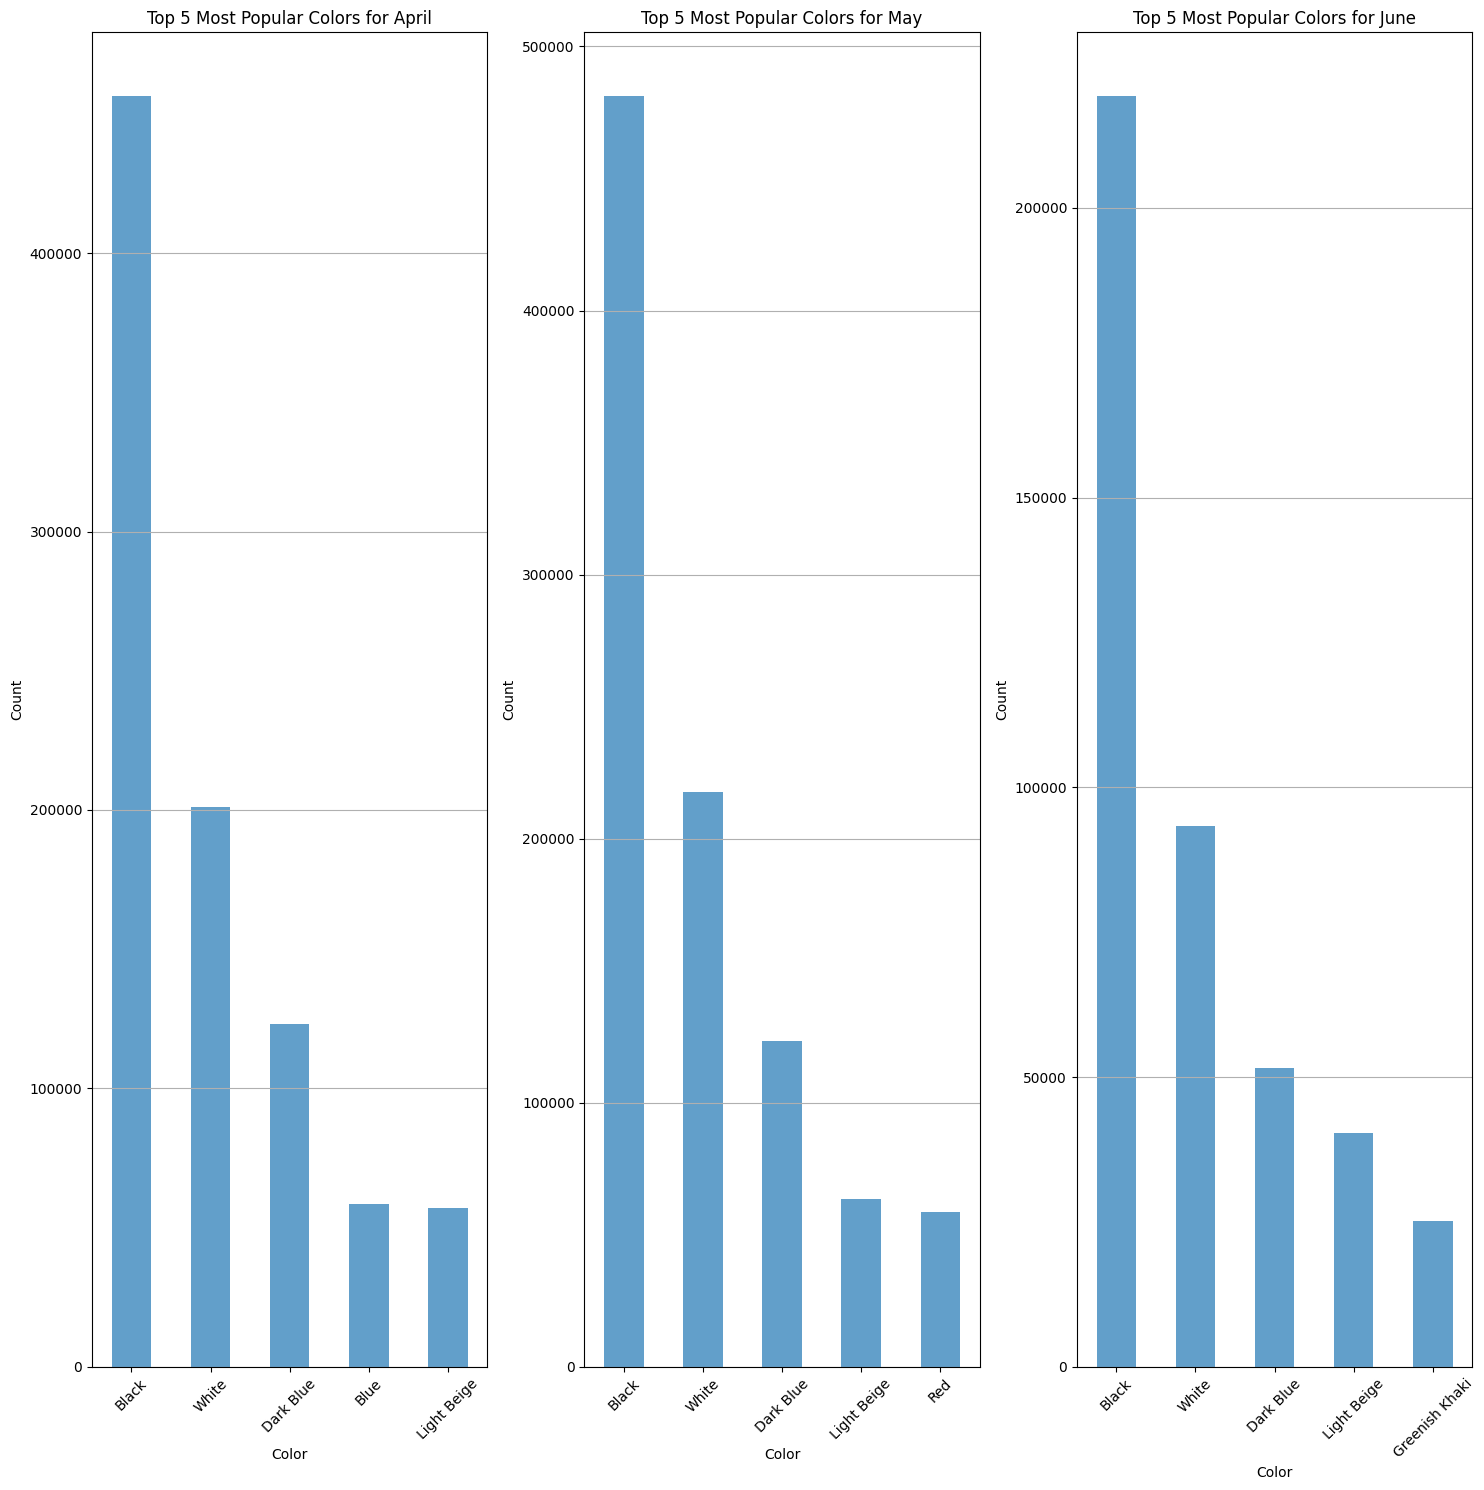

In [10]:
# Top 5 colours for each month

# Extract month from 'transaction_date'
joined_df_train['month'] = joined_df_train['t_dat'].dt.month_name()

# Get unique months
unique_months = joined_df_train['month'].unique()

# Calculate number of rows and columns for the subplot matrix
num_plots = 3  # Set the number of plots you want to display
num_cols = min(len(unique_months), num_plots)
num_rows = (len(unique_months) - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate over unique months and plot
for i, month in enumerate(unique_months):
    # Filter DataFrame for current month
    df_month = joined_df_train[joined_df_train['month'] == month]
    
    # Count occurrences of colors for current month
    color_counts = df_month['colour_group_name'].value_counts()
    
    # Select the top 5 most popular colors
    top_colors = color_counts.head(5)
    
    # Calculate subplot index
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Plot for current month
    if num_rows == 1:
        ax = axes[col_idx]  # For a single row, use only one index
    else:
        ax = axes[row_idx, col_idx]
    
    top_colors.plot(kind='bar', alpha=0.7, ax=ax)
    ax.set_xlabel('Color')
    ax.set_ylabel('Count')
    ax.set_title(f'Top 5 Most Popular Colors for {month}')
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', labelleft=True, labelbottom=True)
    ax.grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()

/var/folders/yp/y72nt3x13xxf6y_95ftgm0k00000gn/T/ipykernel_90003/709822800.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  color_counts = joined_df_train.groupby(['age_group', 'colour_group_name']).size().reset_index(name='count')


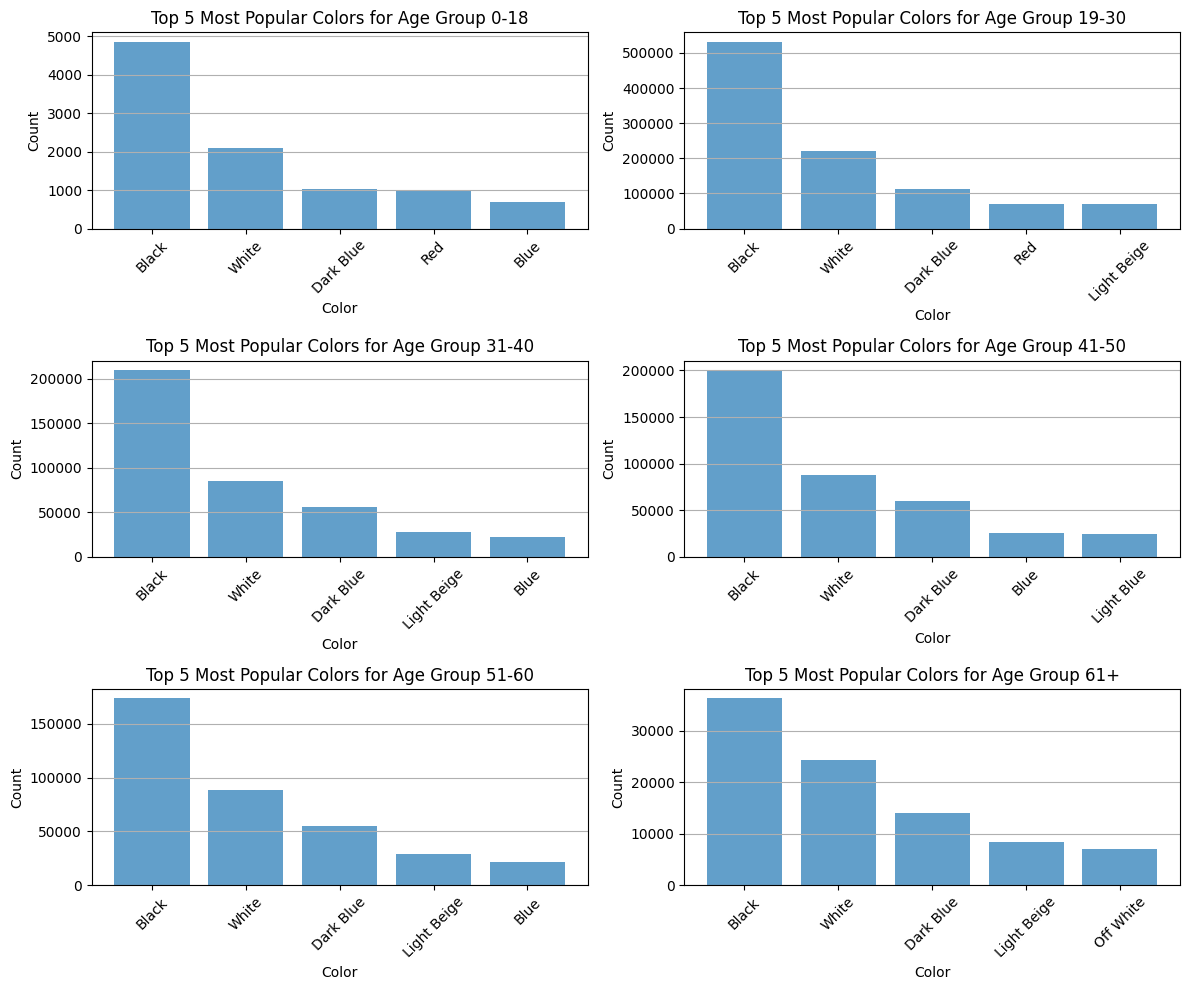

In [12]:
#top 5 colours for each age group

# Define age groups
age_bins = [0, 18, 30, 40, 50, 60, 100]
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']
joined_df_train['age_group'] = pd.cut(joined_df_train['age'], bins=age_bins, labels=age_labels)

# Group by age group and color, then count occurrences
color_counts = joined_df_train.groupby(['age_group', 'colour_group_name']).size().reset_index(name='count')

# Calculate number of rows and columns for the subplot matrix
num_rows = 3
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Iterate over age groups and plot
for i, age_group in enumerate(age_labels):
    # Calculate subplot index
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Filter color counts for current age group
    age_group_colors = color_counts[color_counts['age_group'] == age_group]
    
    # Select top 5 most popular colors
    top_colors = age_group_colors.nlargest(5, 'count')
    
    # Plot for current age group
    ax = axes[row_idx, col_idx]
    ax.bar(top_colors['colour_group_name'], top_colors['count'], alpha=0.7)
    ax.set_xlabel('Color')
    ax.set_ylabel('Count')
    ax.set_title(f'Top 5 Most Popular Colors for Age Group {age_group}')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()

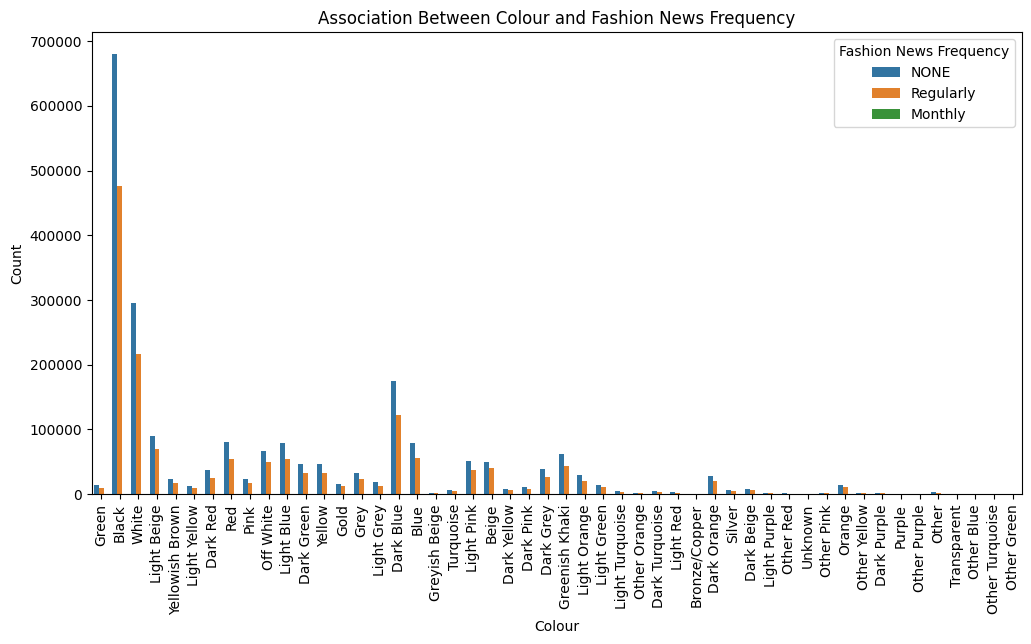

In [13]:
#Association between colour and fashion news frequency

# plot a clustered bar chart
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
sns.countplot(data=joined_df_train, x='colour_group_name', hue='fashion_news_frequency')
plt.title('Association Between Colour and Fashion News Frequency')
plt.xlabel('Colour')
plt.ylabel('Count')
plt.legend(title='Fashion News Frequency')
plt.show()

### Insights for Analysis by Colour
- Black is the most purchased colour across all age groups and months
- Top 5 most popular colours purchased is the same across all age groups
- Top 3 most popular colours purchased in April, May and June are the same
- Consumption of fashion news does not affect colour

# Analyse Price
1. Customers' average spending per month (ie. H&M avg sales per customer per month)

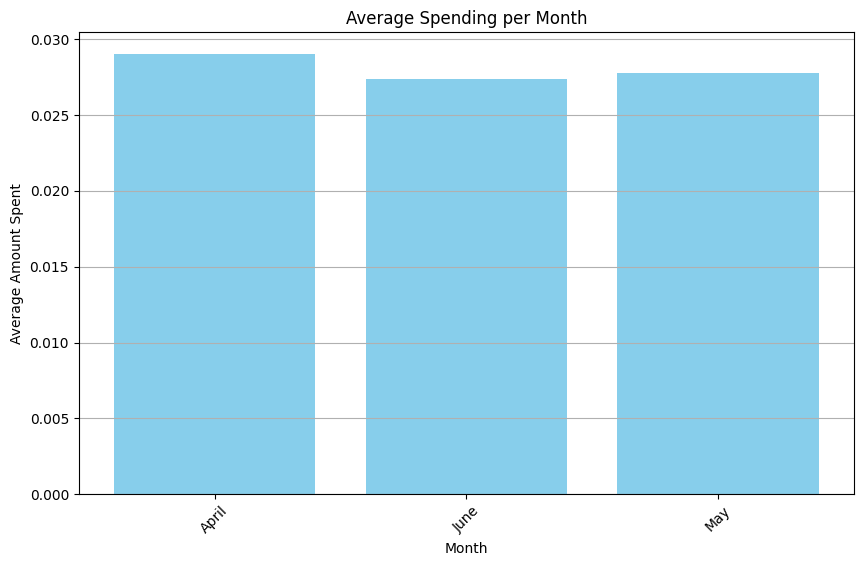

In [14]:
#Customers' average spending per month

# Extract month name from 'transaction_date'
joined_df_train['month_name'] = joined_df_train['t_dat'].dt.strftime('%B')

# Calculate average amount spent by customers for each month
average_amount_per_month = joined_df_train.groupby('month')['price'].mean()

# Plot histogram of average spending for all months
plt.figure(figsize=(10, 6))
plt.bar(average_amount_per_month.index, average_amount_per_month, color='skyblue')
plt.title('Average Spending per Month')
plt.xlabel('Month')
plt.ylabel('Average Amount Spent')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Insights for Analysis of Price
- Highest spending in April, lowest spending in June
- Relatively small variation across the 3 months

# Analyse by Product
1. Top 5 product types for each month
2. Top 5 product types for each age group
3. Association between product type and fashion news frequency

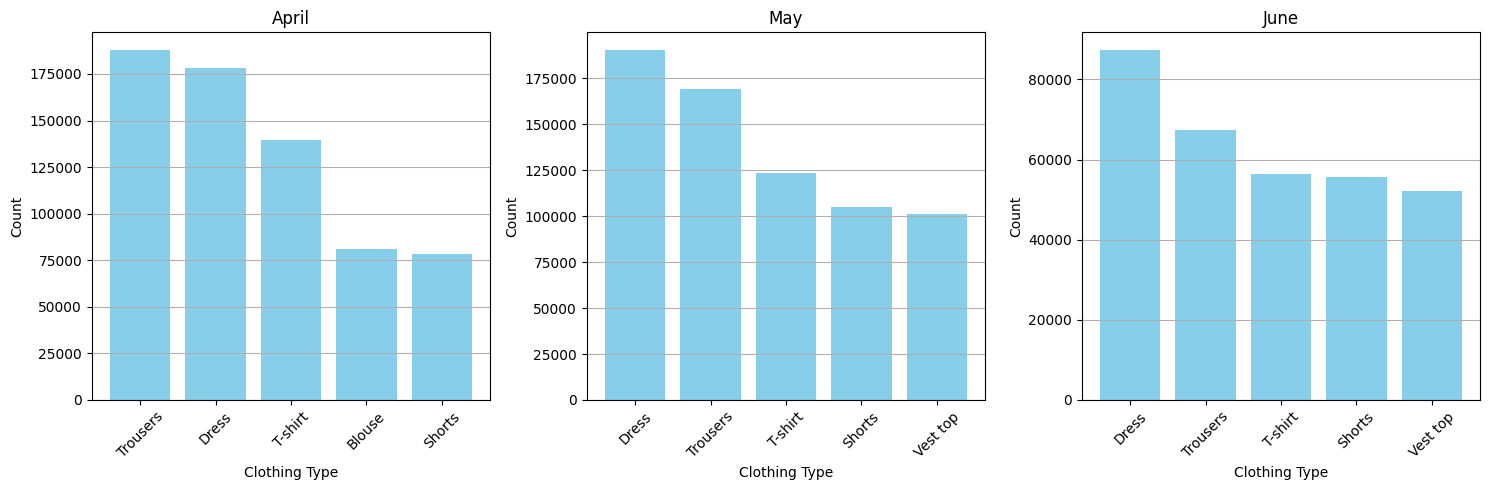

In [17]:
# Top 5 product types for each month

# Extract month from 'date'
joined_df_train['month_name'] = joined_df_train['t_dat'].dt.month.apply(lambda x: calendar.month_name[x])

# Group by month name and clothing type, then count occurrences
clothing_counts = joined_df_train.groupby(['month_name', 'product_type_name']).size().reset_index(name='count')

# Create subplots for each month
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust the number of subplots

for i, month_name in enumerate(calendar.month_name[4:7]): # Iterate over April, May, and June
    # Plot for current month
    ax = axes[i]
    
    # Filter clothing counts for current month
    month_clothing_counts = clothing_counts[clothing_counts['month_name'] == month_name]
    
    # Select top 5 most common clothing types
    top_clothing = month_clothing_counts.nlargest(5, 'count')
    
    # Plot for current month
    ax.bar(top_clothing['product_type_name'], top_clothing['count'], color='skyblue')
    ax.set_title(f'{month_name}')
    ax.set_xlabel('Clothing Type')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

/var/folders/yp/y72nt3x13xxf6y_95ftgm0k00000gn/T/ipykernel_90003/3354026416.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_counts = joined_df_train.groupby(['age_group', 'product_type_name']).size().reset_index(name='count')


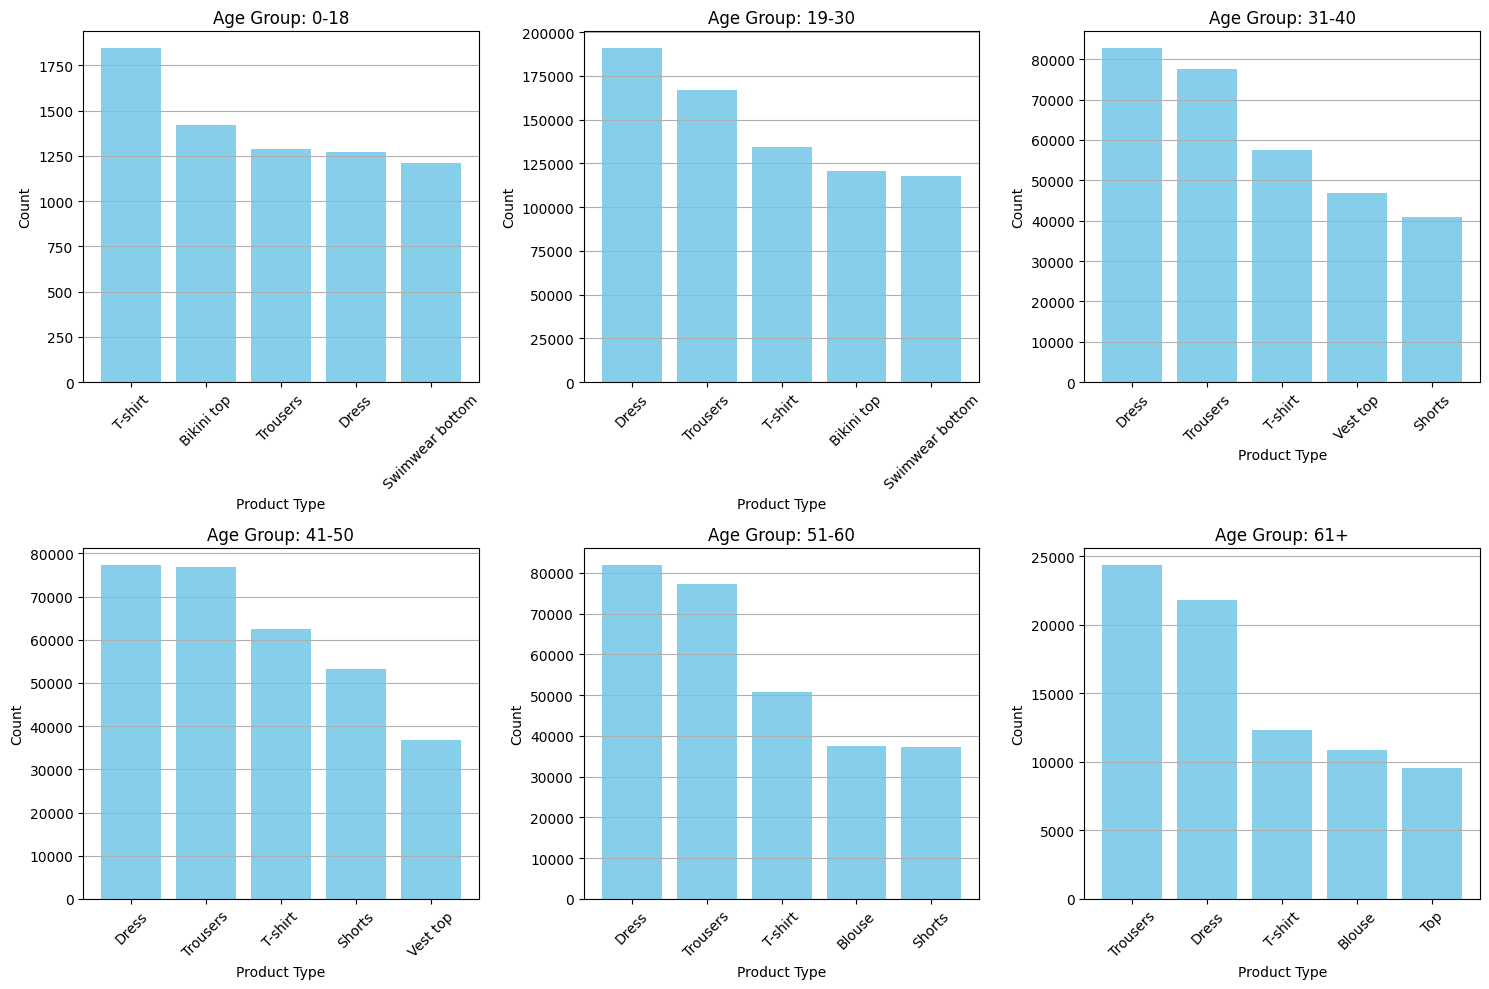

In [19]:
# Top 5 product types for each age group

# Define age groups
age_bins = [0, 18, 30, 40, 50, 60, 100]
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']
joined_df_train['age_group'] = pd.cut(joined_df_train['age'], bins=age_bins, labels=age_labels)

# Group by age group and product type, then count occurrences
product_counts = joined_df_train.groupby(['age_group', 'product_type_name']).size().reset_index(name='count')

# Create subplots for each age group
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, age_group in enumerate(age_labels):
    row_idx = i // 3
    col_idx = i % 3
    
    # Filter product counts for current age group
    age_group_product_counts = product_counts[product_counts['age_group'] == age_group]
    
    # Select top 5 most common product types
    top_products = age_group_product_counts.nlargest(5, 'count')
    
    # Plot for current age group
    ax = axes[row_idx, col_idx]
    ax.bar(top_products['product_type_name'], top_products['count'], color='skyblue')
    ax.set_title(f'Age Group: {age_group}')
    ax.set_xlabel('Product Type')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y')

# Hide empty subplots if there are fewer than 6 age groups
if len(joined_df_train['age_group'].unique()) < 6:
    for i in range(len(joined_df_train['age_group'].unique()), 2 * 3):
        row_idx = i // 3
        col_idx = i % 3
        axes[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()

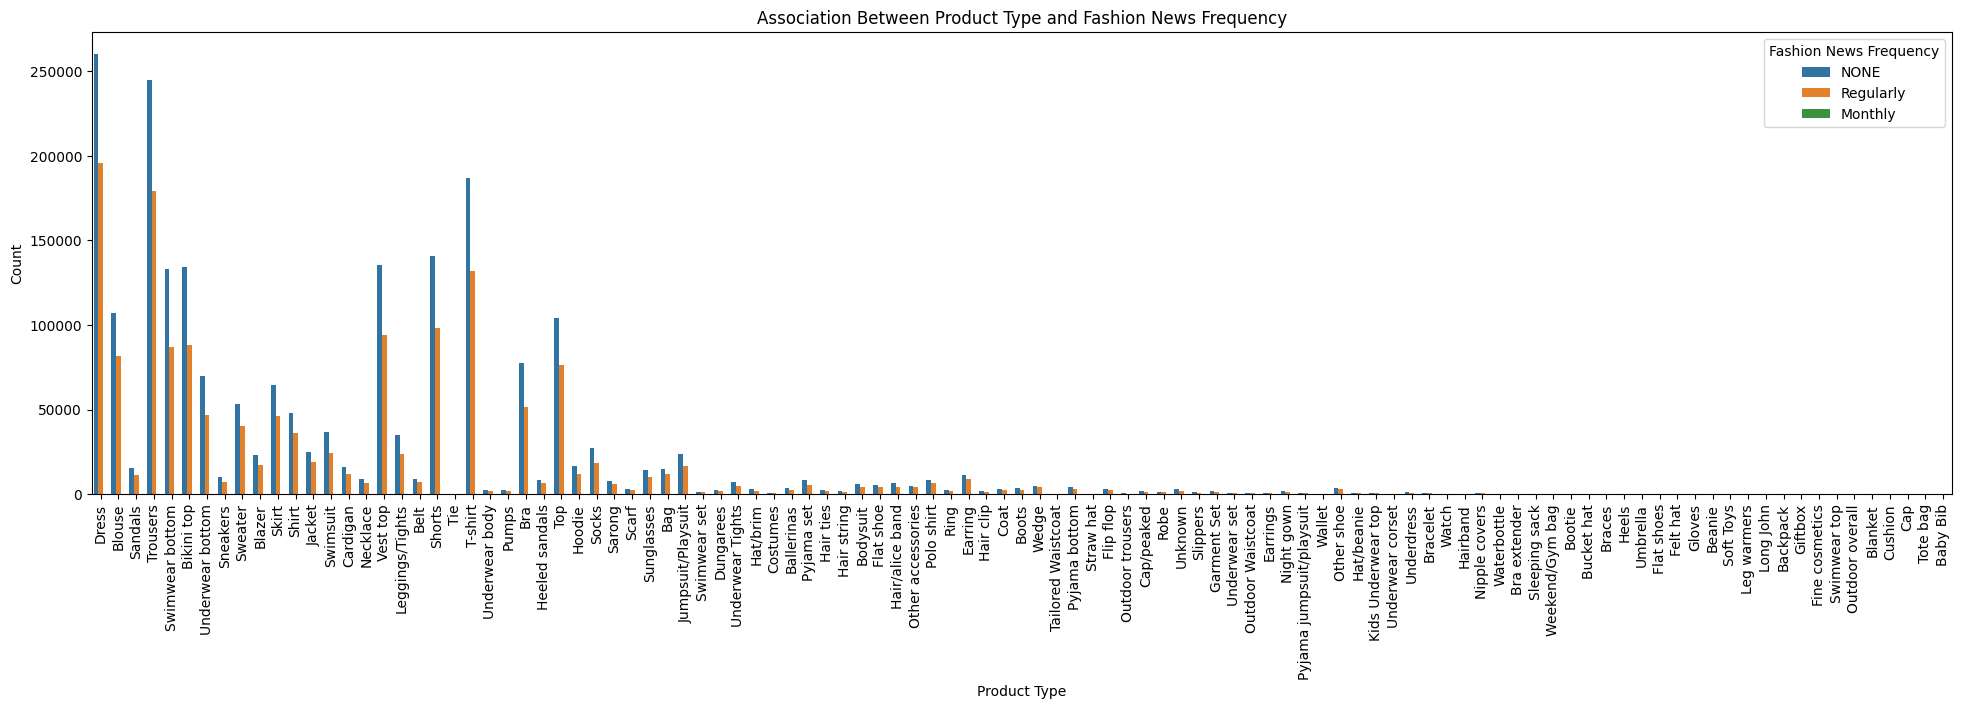

In [20]:
# Association between product type and fashion news frequency

# plot a clustered bar chart
plt.figure(figsize=(24, 6))
plt.xticks(rotation=90)
sns.countplot(data=joined_df_train, x='product_type_name', hue='fashion_news_frequency')
plt.title('Association Between Product Type and Fashion News Frequency')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.legend(title='Fashion News Frequency')
plt.show()

### Insights for Analysis by Product
- Most popular product across most age groups is dresses
    - For customers aged 0 to 18, the most popular product is t-shirts
    - For customers aged 19 to 60, the most popular product is dresses
    - For customers aged 61 and above, the most popular product is trousers
- Most popular product in April is trousers while the most popular product in May and June is dresses
- Consumption of fashion news does not affect product